<a href="https://colab.research.google.com/github/muhammad-ahmad-github/learning-pytorch/blob/main/02_pytorch_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is problem of predicting whether something is one thing or another.

## 1. Make classification data and get it ready

In [7]:
import sklearn

In [8]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [9]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [10]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


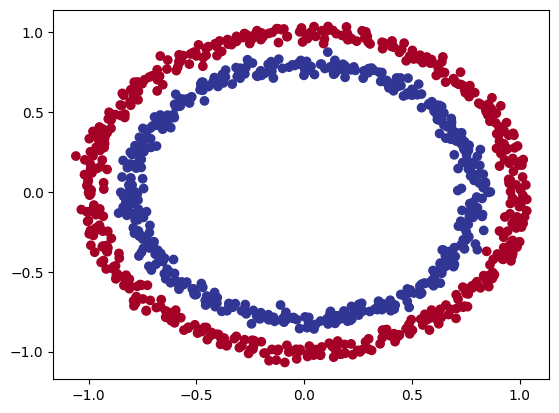

In [11]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The data we're working with is often reffered to as a toy dataset, a dataset that is small enough to experiment on but still sizable enough to practicle the fundamentals.

### 1.1 Check input and output shapes

In [12]:
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [14]:
# View the first exapmle of features and labels
X_sample = X[0]
y_sample = y[0]

print (f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print (f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [15]:
import torch
torch.__version__

'2.0.1+cu118'

In [16]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [17]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]    # first 5 data of each

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [18]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [19]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,   # 0.2 = 20% of data will be test
                                                     random_state=42)

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we wnt to:
1. Setup device agnostic code so our code will run on accelerator (GPU) if we got one.
2. Construct a odel (by subclassing `nn.Module`).
3. Define a loss finction and optimizer
4. Create a training and test loop

In [21]:
# Import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we setup device device agnostic code, Let's create a model that:

1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device

In [22]:
X_train.shape

torch.Size([800, 2])

In [23]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create nn.Linear layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)     # takes 2 features of X and upscale it to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)     # takes in 5 features from previous and output a single feature (same shape as y)

  # 3. Define a forward() method that outlies the forward pass
  def forward(self, x):
    return self_layer_2(self.layer_1(x))    #  x-> layer 1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
device

'cuda'

In [25]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.6981, -0.3072],
        [ 0.4688,  0.4949],
        [-0.6219, -0.3655],
        [-0.5781, -0.5193],
        [ 0.4314,  0.5862]], device='cuda:0', requires_grad=True)

In [26]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5382, -0.6145],
                      [ 0.1847, -0.1098],
                      [ 0.2313, -0.0981],
                      [-0.1104,  0.0196],
                      [-0.0457, -0.3421]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5314,  0.0981, -0.0174,  0.4181,  0.3928], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3961, -0.0921, -0.1382,  0.3502, -0.3950]], device='cuda:0')),
             ('1.bias', tensor([-0.2900], device='cuda:0'))])

In [28]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss fn or optimizer should you use?

Again.. this is problem specific..

For example, for regression you might want MSE, MAE (mean square/absolute error)

For classification you want Binary Cross Entropy or Categorical Cross Entropy (Cross Entropy).

As a reminder, the loss function measures how *wrong* your model predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however there are many builtin options.

In [30]:
# etup the loss function
#los_fn = nn.BCELoss()   # BCELoss = requires inputs to have gone through sigmoid activation fn prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #  BCEWithLogitsLoss = sigmoid activation fn built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [31]:
# Calculate accuracy - out of a 100 examples, what % does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train model

To train our model, we're going to need to build a training loop:
1. Forward pas
2. Calculate the loss
3. Optimize zero grd
4. Loss backward (backpropagation)
5. Optimizer step (gradient decent)

### 3.1 Going from raw logits -> prediction prob -> predition labels

Our model are going to be raw **logits**.

We can convert these **logits** into predition prob. by passing them to some kind of activation fn (e.g sigmoid for binary classification and softmax for multi-class classifications).

Then we can convert our model's prediction prob. to **prediction labels** by either rounding them or taking the `argmax()`.

In [32]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

# logits are the raw output of our model (predictions)

tensor([[-0.0419],
        [-0.1739],
        [ 0.1282],
        [-0.0894],
        [-0.1509]], device='cuda:0')

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
# Use the sigmoid activation fn on our model logits to turn them into prediction prob
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4895],
        [0.4566],
        [0.5320],
        [0.4777],
        [0.4623]], device='cuda:0')

In [35]:
# Converting prob to 1/0 as per our y_label format
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]], device='cuda:0')

For our prediction prob. values, we need to perform a range-style rounding on them:
* `y_pred_prob` >= 0.5, `y=1` (class 1)
* `y_pred_prob` < 0.5, `y=1` (class 0)

In [36]:
# Find the predicted labels
y_pred = torch.round(y_pred_probs)

# In Full ( logits -> pred_probs -> pred_labels)
#y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
# on 5 examples
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality of step-wise and In full implementations Only
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimensions
y_pred.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 0.], device='cuda:0')

In [37]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a Train and Test loop

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # turn logits -> pred probs -> pred label

  # 2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects predition prob. as input
  #               y_train)
  loss = loss_fn(y_logits,       # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient decent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss: 5f}, Acc: {acc:2f}% | Test loss: {test_loss: 5f}, Test acc: {test_acc:2f}%")



Epoch: 0 | Loss:  0.699656, Acc: 48.000000% | Test loss:  0.694165, Test acc: 50.500000%
Epoch: 10 | Loss:  0.698344, Acc: 48.125000% | Test loss:  0.693389, Test acc: 51.500000%
Epoch: 20 | Loss:  0.697392, Acc: 48.750000% | Test loss:  0.692976, Test acc: 52.000000%
Epoch: 30 | Loss:  0.696654, Acc: 48.875000% | Test loss:  0.692759, Test acc: 51.500000%
Epoch: 40 | Loss:  0.696064, Acc: 49.000000% | Test loss:  0.692658, Test acc: 51.000000%
Epoch: 50 | Loss:  0.695581, Acc: 49.000000% | Test loss:  0.692630, Test acc: 50.500000%
Epoch: 60 | Loss:  0.695184, Acc: 49.000000% | Test loss:  0.692651, Test acc: 50.000000%
Epoch: 70 | Loss:  0.694853, Acc: 49.000000% | Test loss:  0.692704, Test acc: 49.000000%
Epoch: 80 | Loss:  0.694577, Acc: 49.500000% | Test loss:  0.692778, Test acc: 49.000000%
Epoch: 90 | Loss:  0.694345, Acc: 49.375000% | Test loss:  0.692865, Test acc: 48.500000%


## 4. Make predictions and evaluate the model

From the metrics it look like our model is not learning anything

So to inspect it let's make some predictions and make them visual!

Visualize it.

To do so we're going to import a function called `plot_decision_boundry()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [39]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

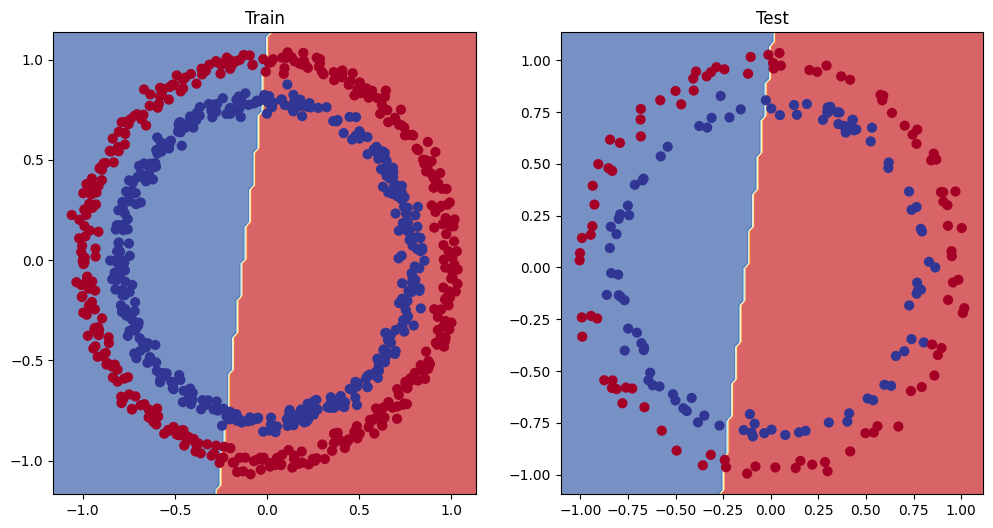

In [40]:
# Plot ecision boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

##5. Improving a model (from a model prespective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units (neurons)
* Change the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's prespective because they deal directly with the model, rather than Data.

And because these options are all values we (as ML Eng and Data scientist) can change, hence they are reffered as **hyperparameters**.

Lets try and improve our model by:
* Adding more hidden unite: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [41]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))   # This way of writing op leverages speed-up whenre possible behing the scene

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# Create a loss fn
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer_fn = torch.optim.SGD (params=model_1.parameters(),
                                lr = 0.1)

In [43]:
# Write a training and Eval loop for model_0
#torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training Loop
for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> pred prob -> pred labels

  # 2. Calculate loss / acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn (y_true=y_train,
                     y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation
  loss.backward()

  # 5. Optimizer step (gradient decent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                      y_test)
    test_acc= accuracy_fn(y_true=y_test,
                          y_pred= test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:.2f}% | Test_loss: {test_loss: 5f}, Test_acc: {test_acc: .2f}%")

Epoch: 0 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 100 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 200 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 300 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 400 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 500 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 600 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 700 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 800 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%
Epoch: 900 | Loss: 0.693955, Acc: 50.88% | Test_loss:  0.692610, Test_acc:  51.00%


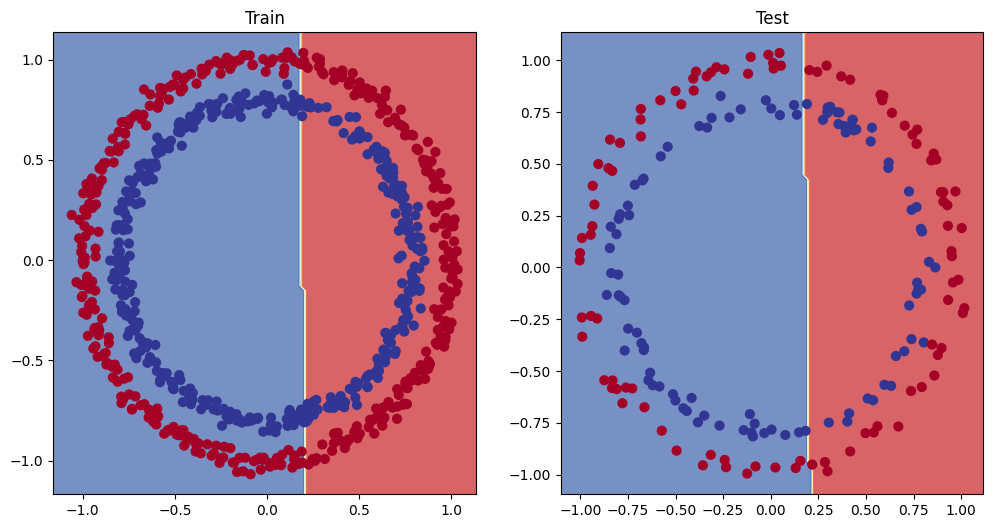

In [44]:
# Plot ecision boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can it a traight line

One way to troubleshoot to a larger problem is to test it on a smaller problem

In [45]:
# Create some data (same as notebok 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check len
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

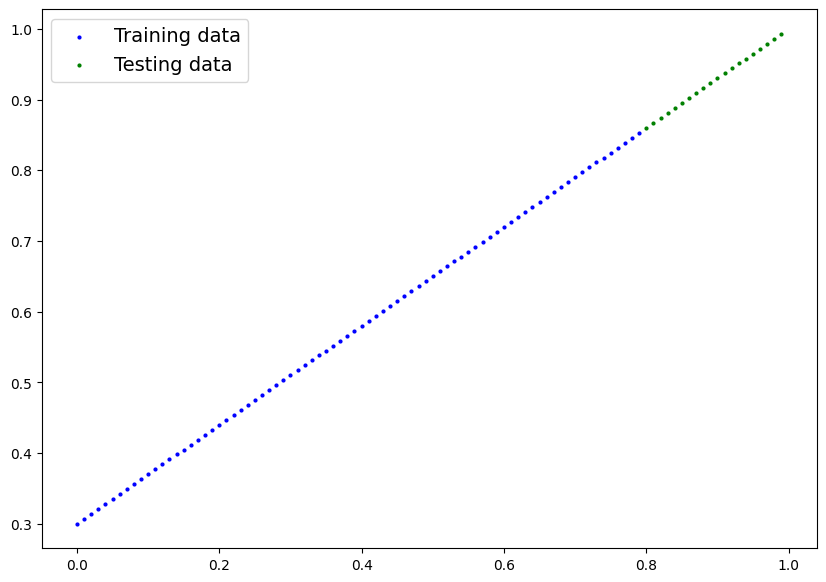

In [47]:
plot_predictions(train_data = X_train_regression,
                 train_labels= y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

### 5.2 Adjusting `model_1` to fit straight line

In [48]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [50]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs=1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  # Printing
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: 5f} | Test_loss: {test_loss: .5f}")

Epoch: 0 | Loss:  0.578958 | Test_loss:  0.82273
Epoch: 100 | Loss:  0.034961 | Test_loss:  0.00156
Epoch: 200 | Loss:  0.032680 | Test_loss:  0.00330
Epoch: 300 | Loss:  0.029423 | Test_loss:  0.00446
Epoch: 400 | Loss:  0.027311 | Test_loss:  0.00570
Epoch: 500 | Loss:  0.026715 | Test_loss:  0.00534
Epoch: 600 | Loss:  0.026269 | Test_loss:  0.00511
Epoch: 700 | Loss:  0.025941 | Test_loss:  0.00496
Epoch: 800 | Loss:  0.024819 | Test_loss:  0.00394
Epoch: 900 | Loss:  0.023328 | Test_loss:  0.00462


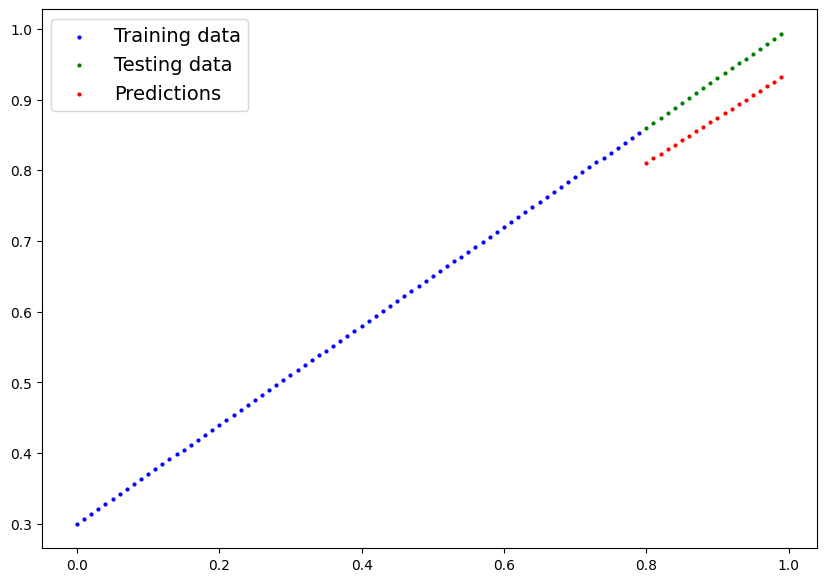

In [51]:
# turn on eval model
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

  #Plot data and pred
  plot_predictions  (train_data   =  X_train_regression.cpu(),
                     train_labels =  y_train_regression.cpu(),
                     test_data    =  X_test_regression.cpu(),
                     test_labels  =  y_test_regression.cpu(),
                     predictions  =  y_preds.cpu());
  #..cpu() as we need to work with numpy and presently all the var are Tensors

## 6. The missing piece: non-linearoty

"What patterns could you draw if you were given an infinite amout of a straight and non-straight lines"

Or in ML terms, an infinite (but really it is finite) of linear and non-linear fn

In [52]:
# Import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6.1 Recreating non-linear data (red and blue circles)

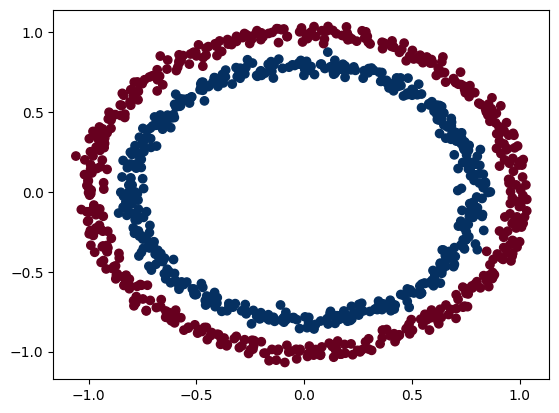

In [53]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [54]:
# Convert data to Tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Trun data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity


In [55]:
# Building a model with non-linear activations
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
    # self.sigmoid = nn.Sigmoid()    # Sigmoid activation

  def forward(self,x):
    # Where should we put our non-linear activation fn:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [56]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Training a model with non-linearity

In [57]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through Data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred prob -> pred label

  # 2. Calc loss
  loss = loss_fn(y_logits, y_train)  # BCEWith LogitLoss (taking in logits as 1st ip)
  acc = accuracy_fn (y_true = y_train,
                     y_pred = y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Set the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()    #.squeeze() to remove size mismatch
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn (test_logits, y_test)
    test_acc = accuracy_fn (y_true = y_test,
                            y_pred = test_pred)

  # Printing
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {acc: .2f}% | Test Loss: {test_loss: .4f}, Test Acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  0.6929, Acc:  50.00% | Test Loss:  0.6932, Test Acc:  50.00%
Epoch: 100 | Loss:  0.6912, Acc:  52.88% | Test Loss:  0.6910, Test Acc:  52.50%
Epoch: 200 | Loss:  0.6898, Acc:  53.37% | Test Loss:  0.6894, Test Acc:  55.00%
Epoch: 300 | Loss:  0.6879, Acc:  53.00% | Test Loss:  0.6872, Test Acc:  56.00%
Epoch: 400 | Loss:  0.6852, Acc:  52.75% | Test Loss:  0.6841, Test Acc:  56.50%
Epoch: 500 | Loss:  0.6810, Acc:  52.75% | Test Loss:  0.6794, Test Acc:  56.50%
Epoch: 600 | Loss:  0.6751, Acc:  54.50% | Test Loss:  0.6729, Test Acc:  56.00%
Epoch: 700 | Loss:  0.6666, Acc:  58.38% | Test Loss:  0.6632, Test Acc:  59.00%
Epoch: 800 | Loss:  0.6516, Acc:  64.00% | Test Loss:  0.6476, Test Acc:  67.50%
Epoch: 900 | Loss:  0.6236, Acc:  74.00% | Test Loss:  0.6215, Test Acc:  79.00%


### 6.4 Evaluation a model trained with non-linear fn

In [58]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

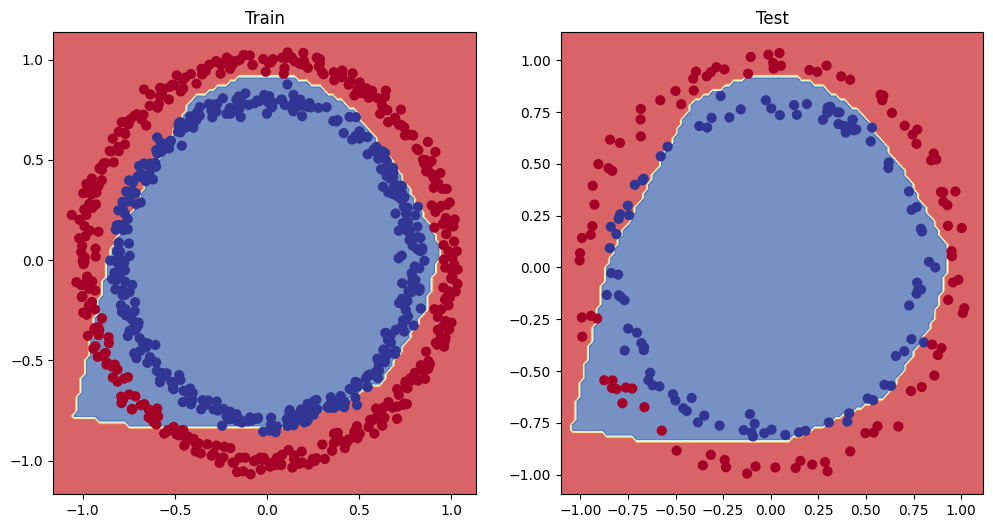

In [59]:
# Plot decision boundries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title ("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation fn

Neural network, rather than us telling the model what to learn, we give it tools to discover patterns in data and it tries to figure out the patterns on its own.

And these are linear & non-linear fn.

In [60]:
# Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float)
A.dtype

torch.float32

In [61]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

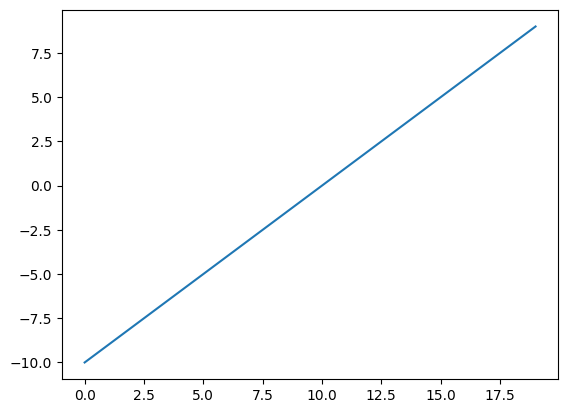

In [62]:
# Visual the tensor
plt.plot(A)

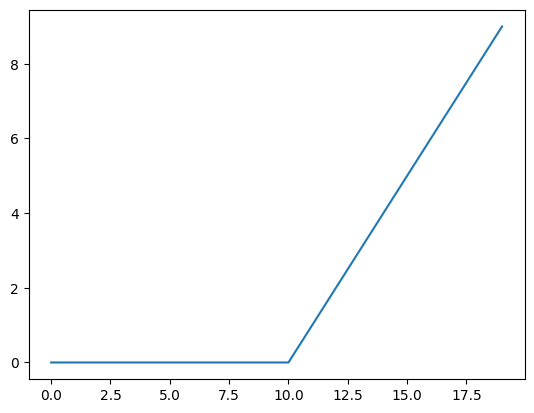

In [63]:
plt.plot(torch.relu(A))

In [64]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)   # input must be Tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

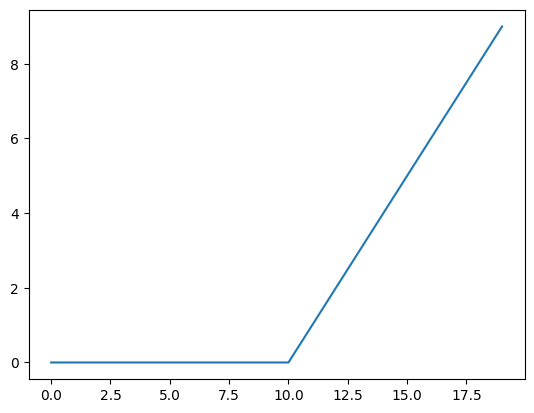

In [65]:
plt.plot(relu(A))

In [66]:
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

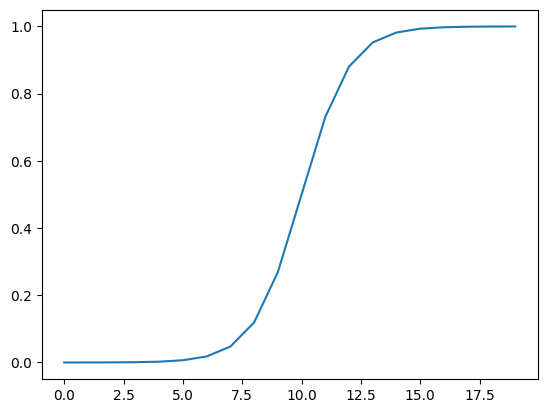

In [67]:
plt.plot(torch.sigmoid(A))

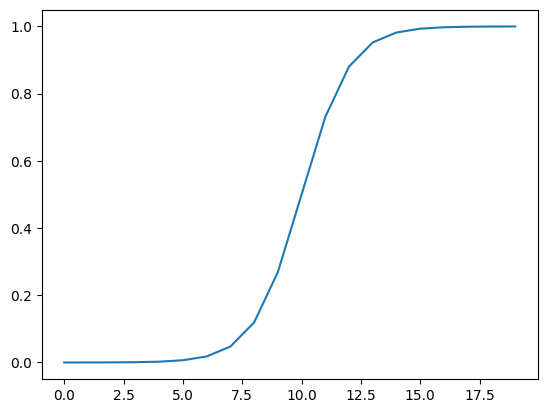

In [68]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

* Binary classification
* Multi-class classification

In [105]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Set Hyperparameters
NUM_CLASSES  = 4
NUM_FEATURES = 2
RANDOM_SEED  = 42

### 8.1 Creating a toy multi-class dataset

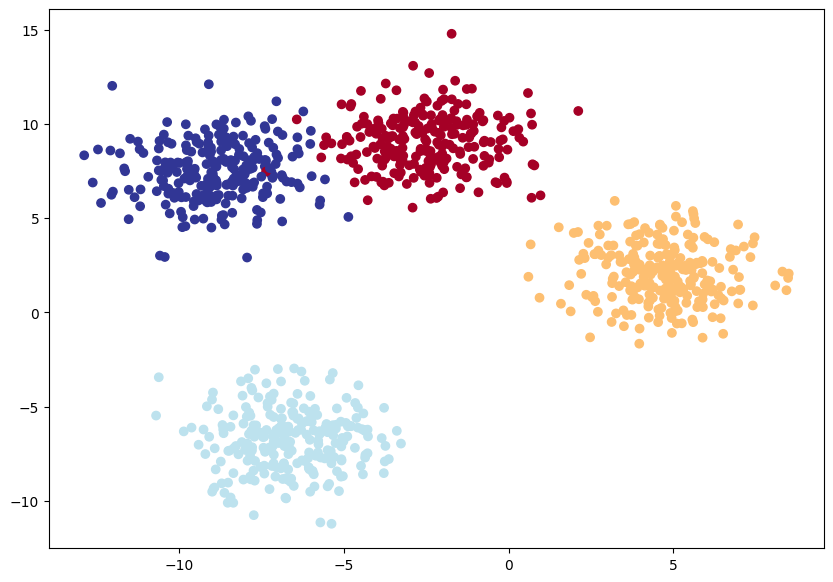

In [106]:
# 1. Creating multi-class data
X_blob, y_blob = make_blobs(n_samples    = 1000,
                            n_features   = NUM_FEATURES,
                            centers      = NUM_CLASSES,
                            cluster_std  = 1.5,   # Give the clusters a bit of shakeup
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (Visualize)
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [107]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [109]:
# Build a multi-class classification model
class BlobModel (nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int) : Number of input features to the model
      output_features (int) : Number of output features (number of output classes)
      hidden_units (int) " Number of hidden units between layers, default 8

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack (x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features= 2,
                    output_features = 4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [110]:
X_train.shape, y_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [111]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss fn and an ptimizer for multi-class classification model

In [112]:
# Create a loss fn for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD (params=model_4.parameters(),
                             lr = 0.1)    # Learning Rate is a HYPERPARAMETER

### 8.4 Getting prediction prob for multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to pred prob and then pred labels

Logits (raw output of the model) -> Pred prob (use `torch.softmax` -> Pred labels (take the `argmax` of the pred prob

In [113]:
# Let's get some raw outputs of our model (logits)

with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_preds [:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [114]:
# Convert our model's logits outputs to prediction prob
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

# Explaination
# From print(y_logits[0])      ->   [-0.1918,  0.0793, -0.3977,  0.0698],
# From print(y_pred_probs[0])  ->   [0.2260, 0.2964, 0.1840, 0.2936],

# Softmax sees the values and predicts the prob of each class
# Here we got 4 ouuput classes so total 4 numbers here
# the max prob is of class1 (0,1,2,3) = 0.2964
# Note: the sum of all these 4 prob = 1
#  Repeat for 1,2,...

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0')
tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0')


In [115]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [116]:
torch.max(y_pred_probs[0])

tensor(0.4236, device='cuda:0')

In [117]:
# Convert out model's pred prob to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0, 2, 0, 2, 0], device='cuda:0')

In [118]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [120]:
from torch.autograd import backward
from scipy import optimize
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred   = torch.softmax (y_logits, dim=1).argmax(dim=1)

  loss = loss_fn (y_logits, y_blob_train)
  acc  = accuracy_fn(y_true = y_blob_train,
                     y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn (test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

  # Printing
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {acc:.2f}% | Test loss: {test_loss: .4f}, Test acc: {test_acc: .2f}%")

Epoch: 0 | Loss:  0.0476, Acc: 98.88% | Test loss:  0.0381, Test acc:  99.00%
Epoch: 10 | Loss:  0.0431, Acc: 98.88% | Test loss:  0.0343, Test acc:  99.00%
Epoch: 20 | Loss:  0.0401, Acc: 98.88% | Test loss:  0.0317, Test acc:  99.00%
Epoch: 30 | Loss:  0.0379, Acc: 98.88% | Test loss:  0.0297, Test acc:  99.00%
Epoch: 40 | Loss:  0.0363, Acc: 98.88% | Test loss:  0.0280, Test acc:  99.00%
Epoch: 50 | Loss:  0.0351, Acc: 98.88% | Test loss:  0.0267, Test acc:  99.00%
Epoch: 60 | Loss:  0.0341, Acc: 98.88% | Test loss:  0.0257, Test acc:  99.50%
Epoch: 70 | Loss:  0.0333, Acc: 98.88% | Test loss:  0.0247, Test acc:  99.50%
Epoch: 80 | Loss:  0.0326, Acc: 98.88% | Test loss:  0.0240, Test acc:  99.50%
Epoch: 90 | Loss:  0.0320, Acc: 98.88% | Test loss:  0.0233, Test acc:  99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [129]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 pred
y_logits [:10]

tensor([[  0.6971,   7.5602,  -3.1564,  -1.4230],
        [ -1.9932,  -8.3769,  -8.3976,   4.5764],
        [ -4.2230,  -3.4879,   6.1224,  -2.8584],
        [ -0.5375,   5.3447,  -1.8659,  -0.6386],
        [  7.6145,   2.8803,  -5.6196,  -2.8793],
        [ -2.4311, -10.0598,  -9.8694,   5.5477],
        [ -3.9963,  -3.2209,   5.6892,  -2.6584],
        [  6.5011,  -0.9666,  -6.4998,  -1.2479],
        [ -4.9044,  -4.2344,   7.4589,  -3.5618],
        [  6.7850,   0.4306,  -6.0709,  -1.8172]], device='cuda:0')

In [130]:
# Go from logits -> Pred prob
y_pred_probs = torch.softmax(y_logits, dim =1)
y_pred_probs [:10]

tensor([[1.0444e-03, 9.9881e-01, 2.2147e-05, 1.2534e-04],
        [1.4005e-03, 2.3651e-06, 2.3166e-06, 9.9859e-01],
        [3.2135e-05, 6.7020e-05, 9.9977e-01, 1.2578e-04],
        [2.7719e-03, 9.9399e-01, 7.3428e-04, 2.5054e-03],
        [9.9126e-01, 8.7133e-03, 1.7730e-06, 2.7467e-05],
        [3.4255e-04, 1.6658e-07, 2.0152e-07, 9.9966e-01],
        [6.2149e-05, 1.3495e-04, 9.9957e-01, 2.3686e-04],
        [9.9900e-01, 5.7067e-04, 2.2562e-06, 4.3074e-04],
        [4.2723e-06, 8.3495e-06, 9.9997e-01, 1.6360e-05],
        [9.9808e-01, 1.7359e-03, 2.6056e-06, 1.8335e-04]], device='cuda:0')

In [125]:
# Go from pred probs to pred labels
# y_pred_probs.argmax()                   # Same as below
y_preds = torch.argmax(y_pred_probs, dim=1)
y_pred[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0], device='cuda:0')

In [128]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

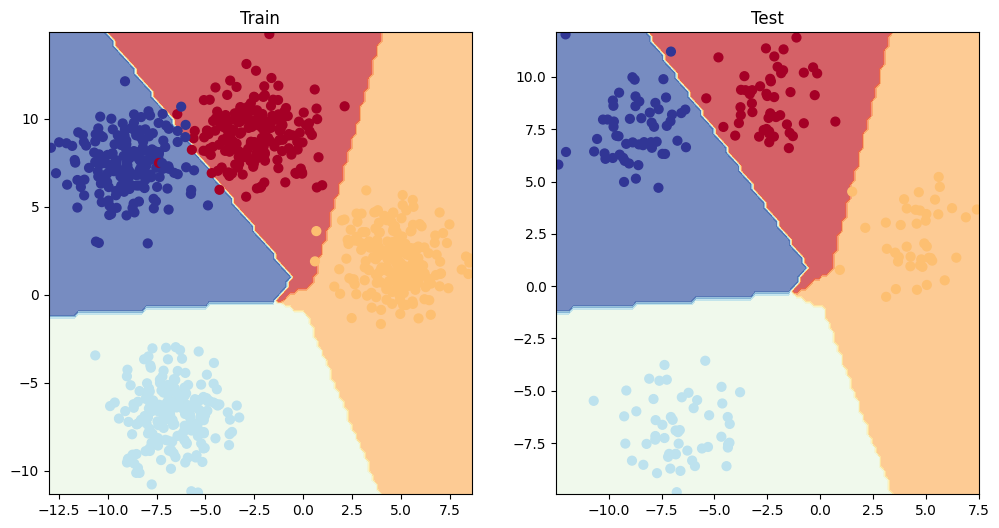

In [133]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more clasification metrices ... (to evaluate our classification model)

* Accuracy - out of 100 saples, how many does our model gets right
* Precision
* Recall
*F1-score
* Confusion matrix
* Classification report

In [147]:
!pip install torchmetrics

In [150]:
from torchmetrics import Accuracy

# Setup metric
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')